In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df=pd.read_csv('/content/smoke_detection_iot.csv')

In [ ]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      62630 non-null  int64  
 1   UTC             62630 non-null  int64  
 2   Temperature[C]  62630 non-null  float64
 3   Humidity[%]     62630 non-null  float64
 4   TVOC[ppb]       62630 non-null  int64  
 5   eCO2[ppm]       62630 non-null  int64  
 6   Raw H2          62630 non-null  int64  
 7   Raw Ethanol     62630 non-null  int64  
 8   Pressure[hPa]   62630 non-null  float64
 9   PM1.0           62630 non-null  float64
 10  PM2.5           62630 non-null  float64
 11  NC0.5           62630 non-null  float64
 12  NC1.0           62630 non-null  float64
 13  NC2.5           62630 non-null  float64
 14  CNT             62630 non-null  int64  
 15  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(8)
memory usage: 7.6 MB


In [ ]:
df.shape

(62630, 16)

In [ ]:
df.isnull().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [ ]:
df['Temperature[C]'].fillna(df['Temperature[C]'].median(), inplace=True)
df['Humidity[%]'].fillna(df['Humidity[%]'].median(), inplace=True)
df['TVOC[ppb]'].fillna(df['TVOC[ppb]'].median(), inplace=True)
df['eCO2[ppm]'].fillna(df['eCO2[ppm]'].median(), inplace=True)
df['Raw H2'].fillna(df['Raw H2'].median(), inplace=True)
df['Pressure[hPa]'].fillna(df['Pressure[hPa]'].median(), inplace=True)
df['PM2.5'].fillna(df['PM2.5'].median(), inplace=True)
df['NC0.5'].fillna(df['NC0.5'].median(), inplace=True)
df['NC2.5'].fillna(df['NC2.5'].median(), inplace=True)
df['CNT'].fillna(df['CNT'].median(), inplace=True)
df['Fire Alarm'].fillna(df['Fire Alarm'].median(), inplace=True)

**Detecting** **outliers** **using** **boxplot**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

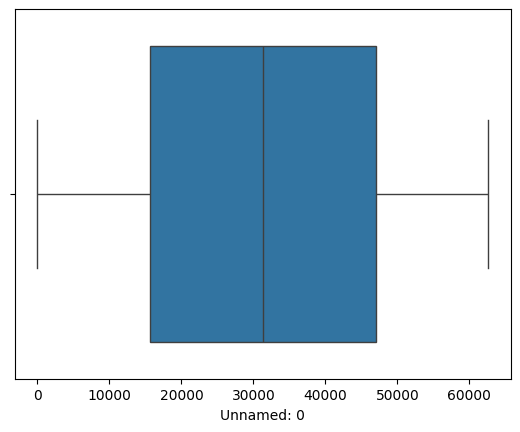

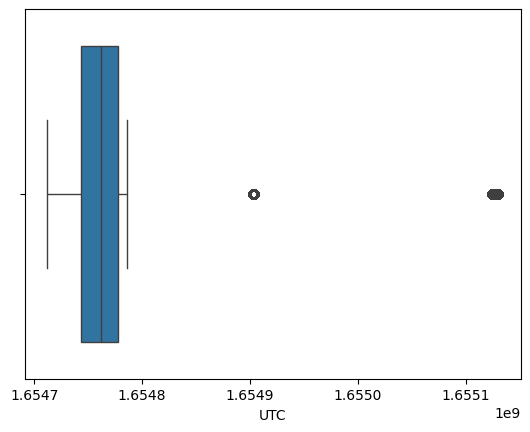

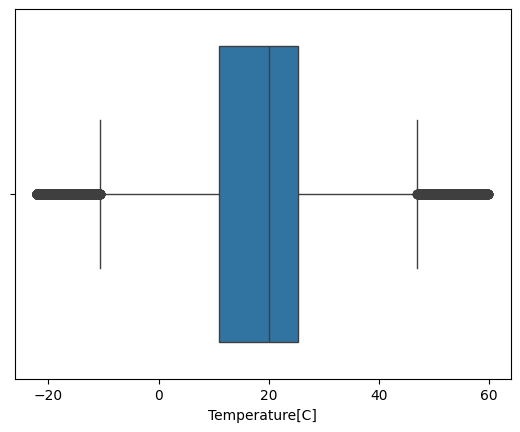

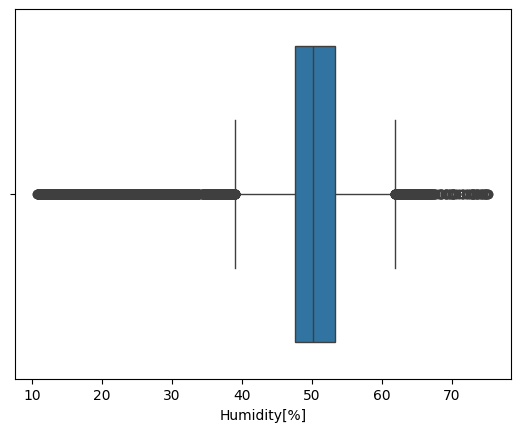

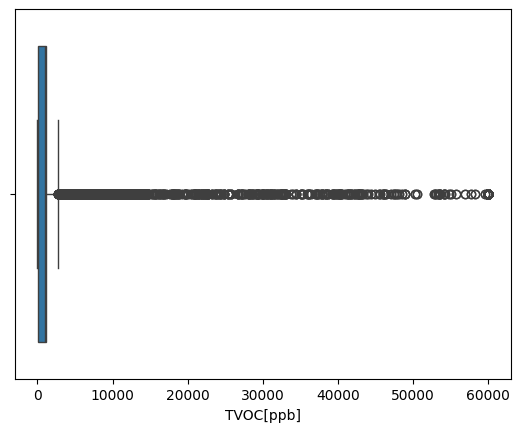

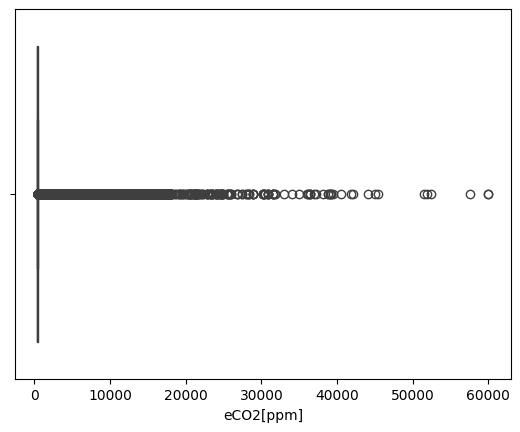

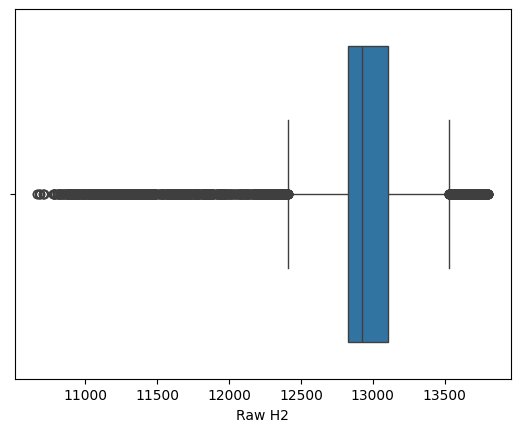

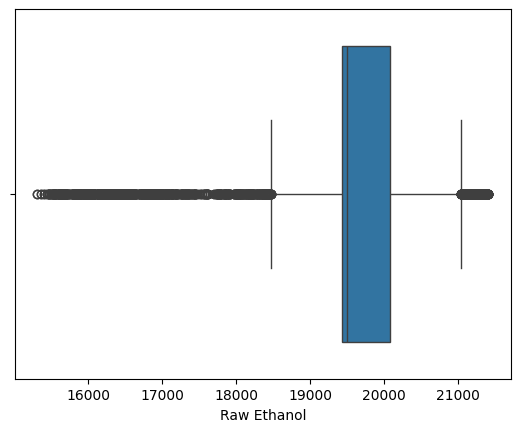

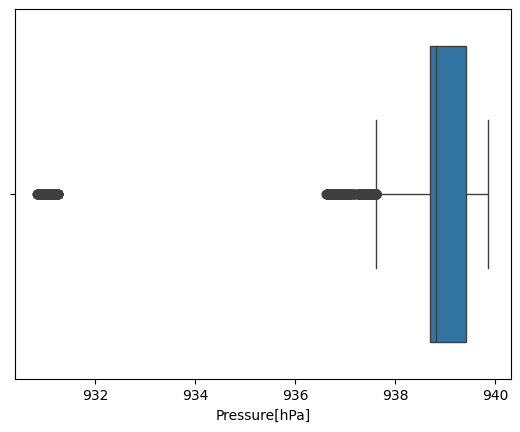

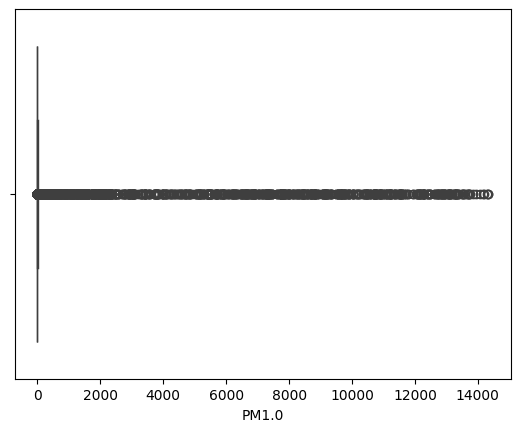

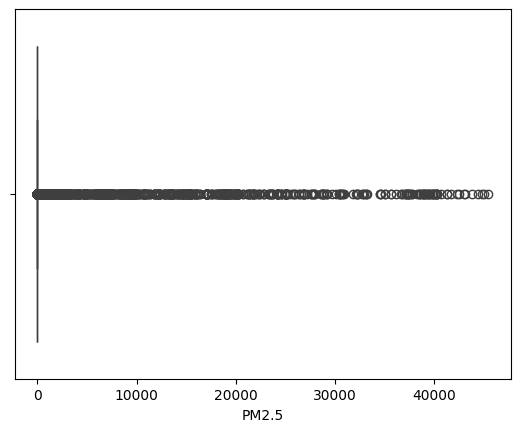

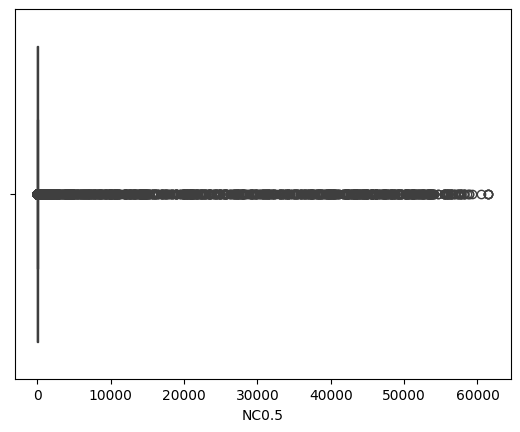

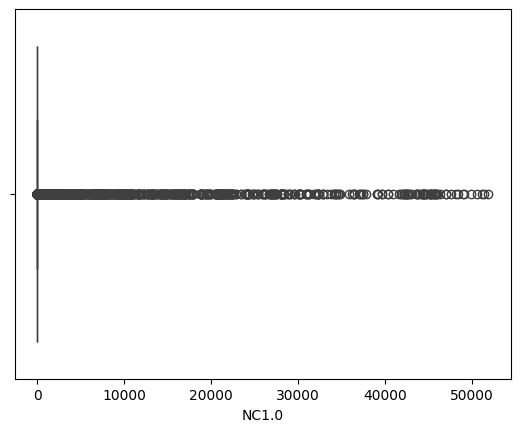

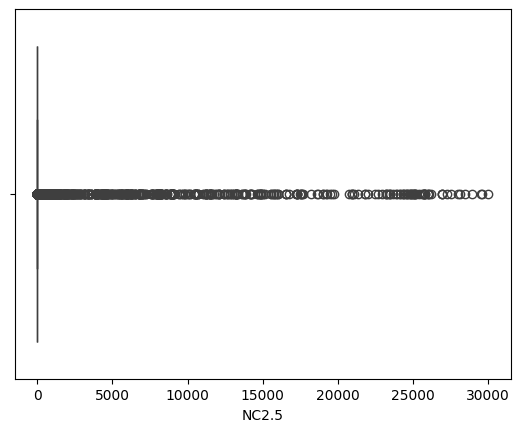

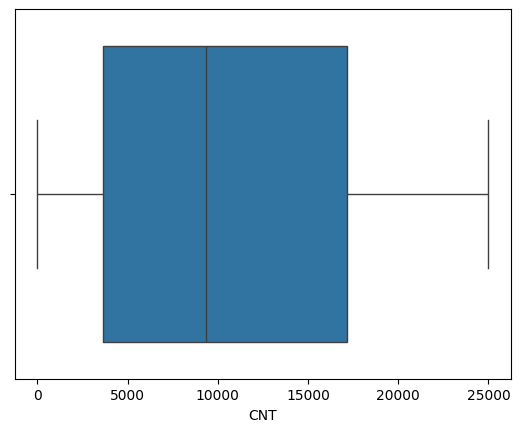

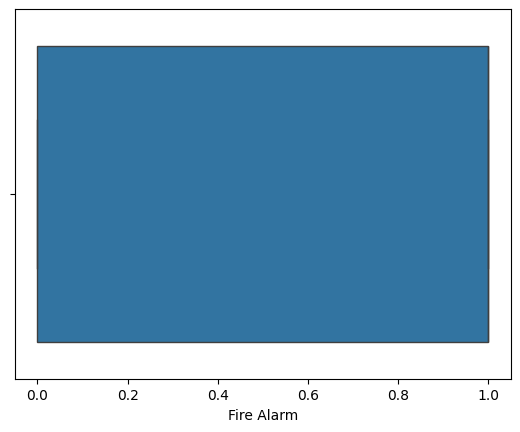

In [ ]:
def func(col):
  sns.boxplot(x=col,data=df)
  plt.show()
for i in df.columns:
  func(i)

Removing outliers

In [ ]:
IQR = df['UTC'].quantile(0.75)-df['UTC'].quantile(0.25)
IQR

34332.5

In [ ]:
lowerBound=df['UTC'].quantile(0.25)-(1.5*IQR)
lowerBound

1654691745.5

In [ ]:
upperBound=df['UTC'].quantile(0.75)+(1.5*IQR)
upperBound

1654829075.5

In [ ]:
df['UTC']=np.where(df['UTC']>upperBound,upperBound,df['UTC'])
df['UTC']=np.where(df['UTC']<lowerBound,lowerBound,df['UTC'])

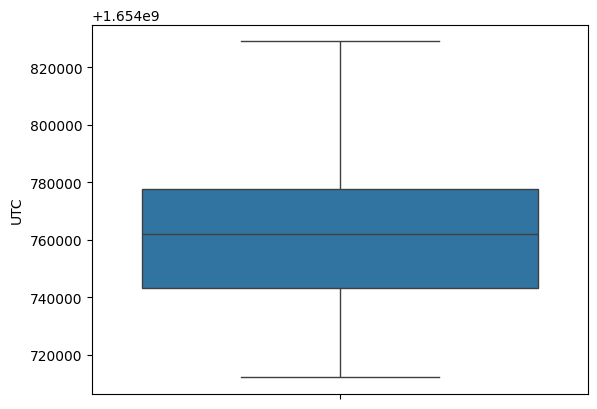

In [ ]:
sns.boxplot(df['UTC'])
plt.show()

**Removing** **Outliers**

In [ ]:
IQR = df['Temperature[C]'].quantile(0.75)-df['Temperature[C]'].quantile(0.25)
IQR

14.415250000000002

In [ ]:
lowerBound=df['Temperature[C]'].quantile(0.25)-(1.5*IQR)
lowerBound

-10.628625000000005

In [ ]:
upperBound=df['Temperature[C]'].quantile(0.75)+(1.5*IQR)
upperBound

47.032375

In [ ]:
df['Temperature[C]']=np.where(df['Temperature[C]']>upperBound,upperBound,df['Temperature[C]'])
df['Temperature[C]']=np.where(df['Temperature[C]']<lowerBound,lowerBound,df['Temperature[C]'])

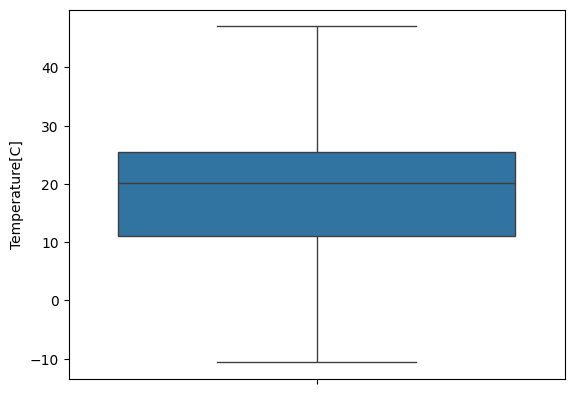

In [ ]:
sns.boxplot(df['Temperature[C]'])
plt.show()

In [ ]:
IQR = df['TVOC[ppb]'].quantile(0.75)-df['TVOC[ppb]'].quantile(0.25)
IQR

1059.0

In [ ]:
lowerBound=df['TVOC[ppb]'].quantile(0.25)-(1.5*IQR)
lowerBound

-1458.5

In [ ]:
upperBound=df['TVOC[ppb]'].quantile(0.75)+(1.5*IQR)
upperBound

2777.5

In [ ]:
df['TVOC[ppb]']=np.where(df['TVOC[ppb]']>upperBound,upperBound,df['TVOC[ppb]'])
df['TVOC[ppb]']=np.where(df['TVOC[ppb]']<lowerBound,lowerBound,df['TVOC[ppb]'])

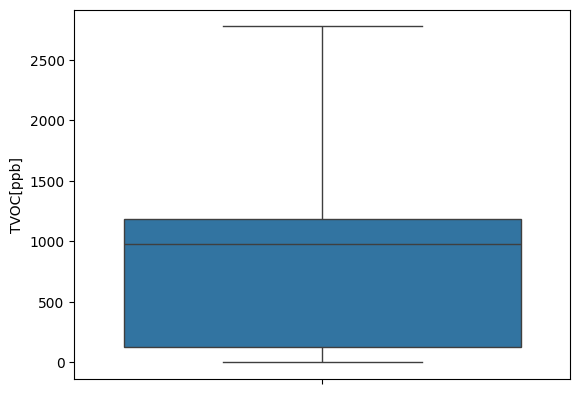

In [ ]:
sns.boxplot(df['TVOC[ppb]'])
plt.show()

In [ ]:
IQR = df['Raw H2'].quantile(0.75)-df['Raw H2'].quantile(0.25)
IQR

279.0

In [ ]:
lowerBound=df['Raw H2'].quantile(0.25)-(1.5*IQR)
lowerBound

12411.5

In [ ]:
upperBound=df['Raw H2'].quantile(0.75)+(1.5*IQR)
upperBound

13527.5

In [ ]:
df['Raw H2']=np.where(df['Raw H2']>upperBound,upperBound,df['Raw H2'])
df['Raw H2']=np.where(df['Raw H2']<lowerBound,lowerBound,df['Raw H2'])

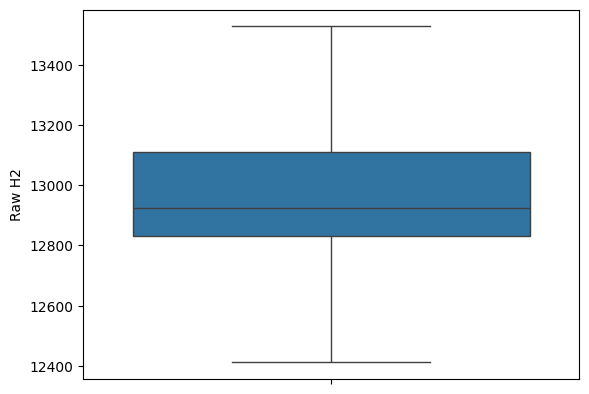

In [ ]:
sns.boxplot(df['Raw H2'])
plt.show()

In [ ]:
IQR = df['Raw Ethanol'].quantile(0.75)-df['Raw Ethanol'].quantile(0.25)
IQR

643.0

In [ ]:
lowerBound=df['Raw Ethanol'].quantile(0.25)-(1.5*IQR)
lowerBound

18470.5

In [ ]:
upperBound=df['Raw Ethanol'].quantile(0.75)+(1.5*IQR)
upperBound

21042.5

In [ ]:
df['Raw Ethanol']=np.where(df['Raw Ethanol']>upperBound,upperBound,df['Raw Ethanol'])
df['Raw Ethanol']=np.where(df['Raw Ethanol']<lowerBound,lowerBound,df['Raw Ethanol'])

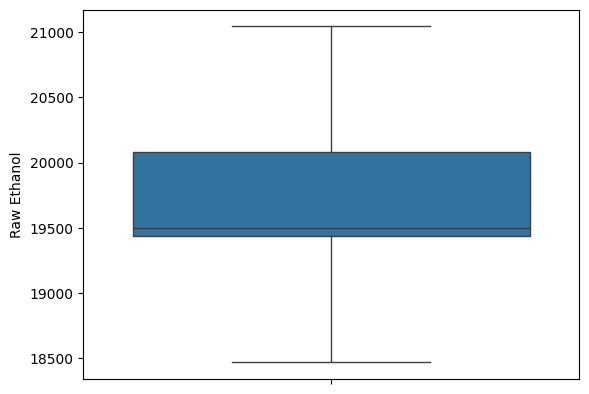

In [ ]:
sns.boxplot(df['Raw Ethanol'])
plt.show()

In [ ]:
IQR = df['Humidity[%]'].quantile(0.75)-df['Humidity[%]'].quantile(0.25)
IQR

5.710000000000001

In [ ]:
lowerBound=df['Humidity[%]'].quantile(0.25)-(1.5*IQR)
lowerBound

38.965

In [ ]:
upperBound=df['Humidity[%]'].quantile(0.75)+(1.5*IQR)
upperBound

61.80500000000001

In [ ]:
df['Humidity[%]']=np.where(df['Humidity[%]']>upperBound,upperBound,df['Humidity[%]'])
df['Humidity[%]']=np.where(df['Humidity[%]']<lowerBound,lowerBound,df['Humidity[%]'])

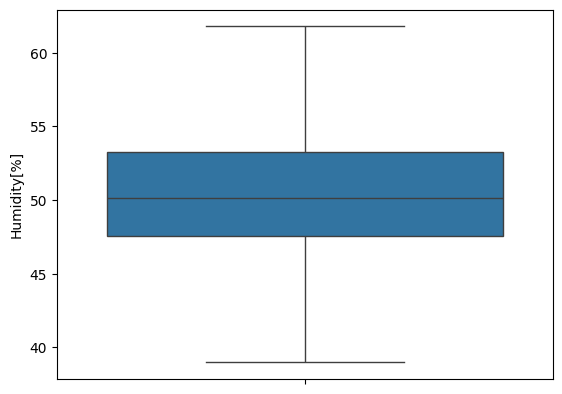

In [ ]:
sns.boxplot(df['Humidity[%]'])
plt.show()

In [ ]:
IQR = df['eCO2[ppm]'].quantile(0.75)-df['eCO2[ppm]'].quantile(0.25)
IQR

38.0

In [ ]:
lowerBound=df['eCO2[ppm]'].quantile(0.25)-(1.5*IQR)
lowerBound

343.0

In [ ]:
upperBound=df['eCO2[ppm]'].quantile(0.75)+(1.5*IQR)
upperBound

495.0

In [ ]:
df['eCO2[ppm]']=np.where(df['eCO2[ppm]']>upperBound,upperBound,df['eCO2[ppm]'])
df['eCO2[ppm]']=np.where(df['eCO2[ppm]']<lowerBound,lowerBound,df['eCO2[ppm]'])

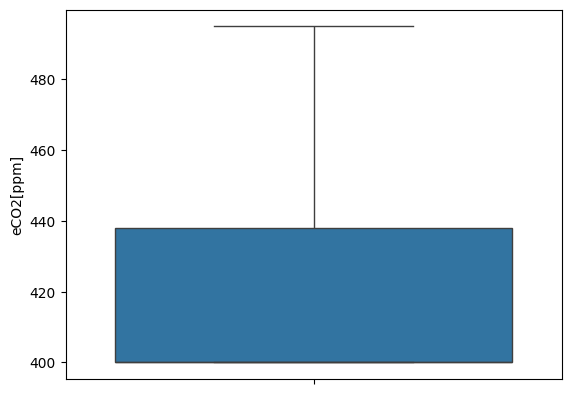

In [ ]:
sns.boxplot(df['eCO2[ppm]'])
plt.show()

In [ ]:
IQR = df['Pressure[hPa]'].quantile(0.75)-df['Pressure[hPa]'].quantile(0.25)
IQR

0.7179999999999609

In [ ]:
lowerBound=df['Pressure[hPa]'].quantile(0.25)-(1.5*IQR)
lowerBound

937.623

In [ ]:
upperBound=df['Pressure[hPa]'].quantile(0.75)+(1.5*IQR)
upperBound

940.4949999999999

In [ ]:
df['Pressure[hPa]']=np.where(df['Pressure[hPa]']>upperBound,upperBound,df['Pressure[hPa]'])
df['Pressure[hPa]']=np.where(df['Pressure[hPa]']<lowerBound,lowerBound,df['Pressure[hPa]'])

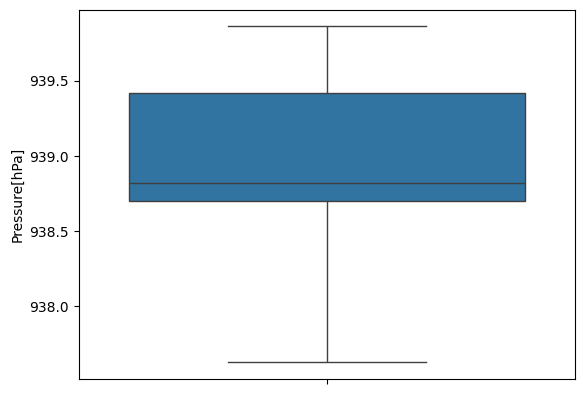

In [ ]:
sns.boxplot(df['Pressure[hPa]'])
plt.show()

In [ ]:
IQR = df['PM1.0'].quantile(0.75)-df['PM1.0'].quantile(0.25)
IQR

0.8099999999999998

In [ ]:
lowerBound=df['PM1.0'].quantile(0.25)-(1.5*IQR)
lowerBound

0.06500000000000017

In [ ]:
upperBound=df['PM1.0'].quantile(0.75)+(1.5*IQR)
upperBound

3.3049999999999997

In [ ]:
df['PM1.0']=np.where(df['PM1.0']>upperBound,upperBound,df['PM1.0'])
df['PM1.0']=np.where(df['PM1.0']<lowerBound,lowerBound,df['PM1.0'])

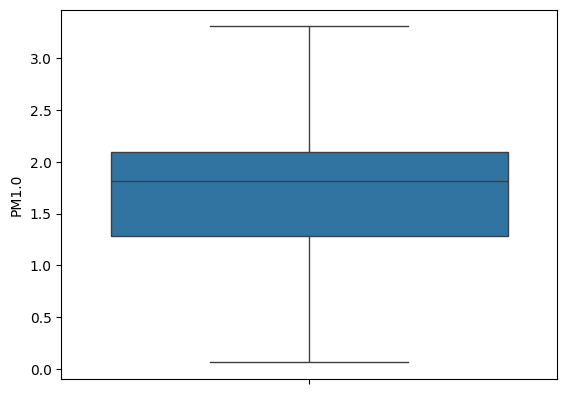

In [ ]:
sns.boxplot(df['PM1.0'])
plt.show()

In [ ]:
IQR = df['PM2.5'].quantile(0.75)-df['PM2.5'].quantile(0.25)
IQR

0.8400000000000001

In [ ]:
lowerBound=df['PM2.5'].quantile(0.25)-(1.5*IQR)
lowerBound

0.07999999999999985

In [ ]:
upperBound=df['PM2.5'].quantile(0.75)+(1.5*IQR)
upperBound

3.4400000000000004

In [ ]:
df['PM2.5']=np.where(df['PM2.5']>upperBound,upperBound,df['PM2.5'])
df['PM2.5']=np.where(df['PM2.5']<lowerBound,lowerBound,df['PM2.5'])

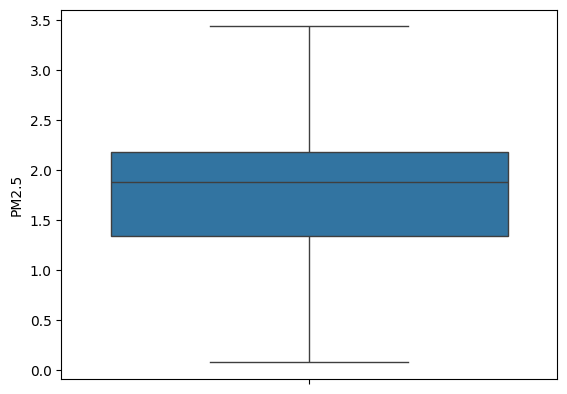

In [ ]:
sns.boxplot(df['PM2.5'])
plt.show()

In [ ]:
IQR = df['NC1.0'].quantile(0.75)-df['NC1.0'].quantile(0.25)
IQR

0.8650000000000002

In [ ]:
lowerBound=df['NC1.0'].quantile(0.25)-(1.5*IQR)
lowerBound

0.08649999999999958

In [ ]:
upperBound=df['NC1.0'].quantile(0.75)+(1.5*IQR)
upperBound

3.5465000000000004

In [ ]:
df['NC1.0']=np.where(df['NC1.0']>upperBound,upperBound,df['NC1.0'])
df['NC1.0']=np.where(df['NC1.0']<lowerBound,lowerBound,df['NC1.0'])

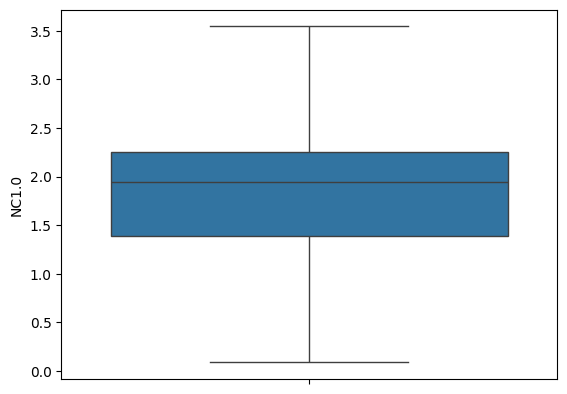

In [ ]:
sns.boxplot(df['NC1.0'])
plt.show()

In [ ]:
IQR = df['NC0.5'].quantile(0.75)-df['NC0.5'].quantile(0.25)
IQR

5.6

In [ ]:
lowerBound=df['NC0.5'].quantile(0.25)-(1.5*IQR)
lowerBound

0.4200000000000017

In [ ]:
upperBound=df['NC0.5'].quantile(0.75)+(1.5*IQR)
upperBound

22.82

In [ ]:
df['NC0.5']=np.where(df['NC0.5']>upperBound,upperBound,df['NC0.5'])
df['NC0.5']=np.where(df['NC0.5']<lowerBound,lowerBound,df['NC0.5'])

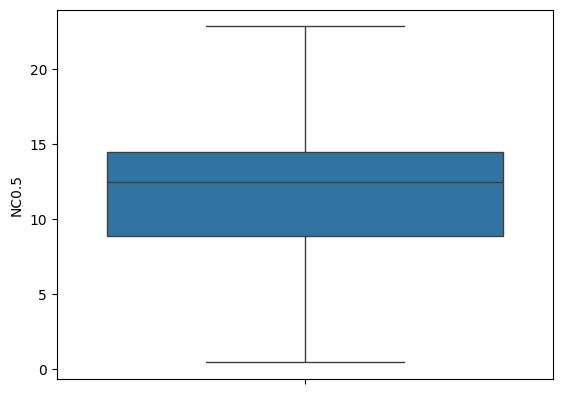

In [ ]:
sns.boxplot(df['NC0.5'])
plt.show()

In [ ]:
IQR = df['NC2.5'].quantile(0.75)-df['NC2.5'].quantile(0.25)
IQR

0.017999999999999995

In [ ]:
lowerBound=df['NC2.5'].quantile(0.25)-(1.5*IQR)
lowerBound

0.006000000000000009

In [ ]:
upperBound=df['NC2.5'].quantile(0.75)+(1.5*IQR)
upperBound

0.07799999999999999

In [ ]:
df['NC2.5']=np.where(df['NC2.5']>upperBound,upperBound,df['NC2.5'])
df['NC2.5']=np.where(df['NC2.5']<lowerBound,lowerBound,df['NC2.5'])

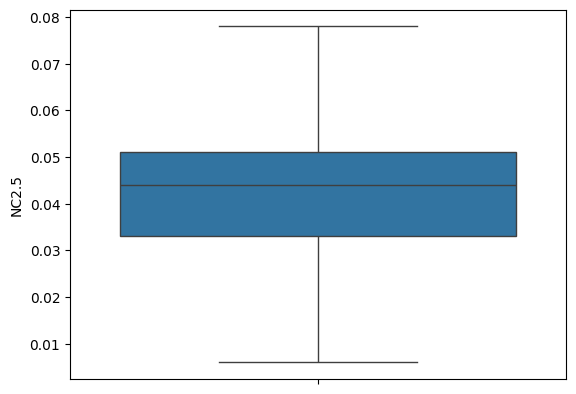

In [ ]:
sns.boxplot(df['NC2.5'])
plt.show()

**Performing** **Exploratory** **Data** **Analysis**(**EDA**)

In [ ]:
#Descriptive analysis
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654763e+09,16.206412,49.773158,773.275962,425.174725,12957.084009,19778.042208,938.820659,1.650188,1.717029,11.354503,1.773893,0.040639,10511.386157,0.714626
std,18079.868017,2.996534e+04,13.315496,4.902857,669.558671,37.460487,193.027726,489.463756,0.700197,0.715798,0.741752,4.939681,0.765599,0.016877,7597.870997,0.451596
min,0.000000,1.654712e+09,-10.628625,38.965000,0.000000,400.000000,12411.500000,18470.500000,937.623000,0.065000,0.080000,0.420000,0.086500,0.006000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.654829e+09,47.032375,61.805000,2777.500000,495.000000,13527.500000,21042.500000,939.861000,3.305000,3.440000,22.820000,3.546500,0.078000,24993.000000,1.000000


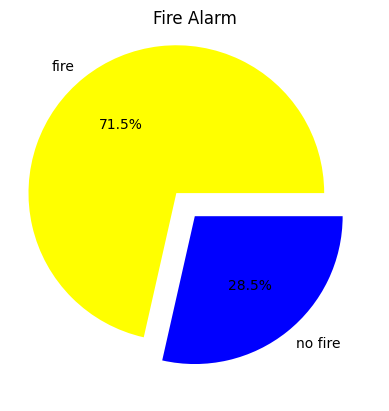

In [ ]:
#Visualizing data
#Univariate analysis
plt.pie(df['Fire Alarm'].value_counts(),[0.2,0],labels=['fire','no fire'],autopct='%1.1f%%',colors=['yellow','blue'])
plt.title('Fire Alarm')
plt.show()

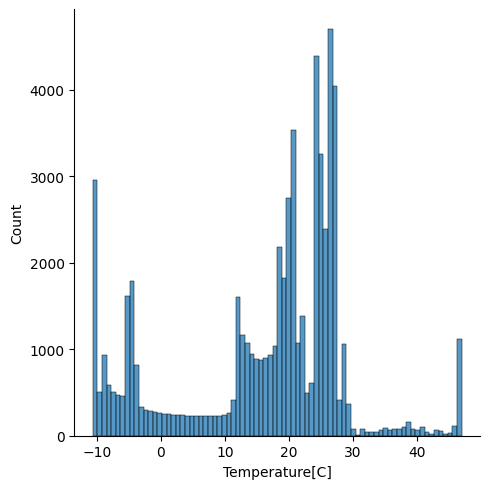

In [ ]:
#visualizing temperature
sns.displot(df['Temperature[C]'])

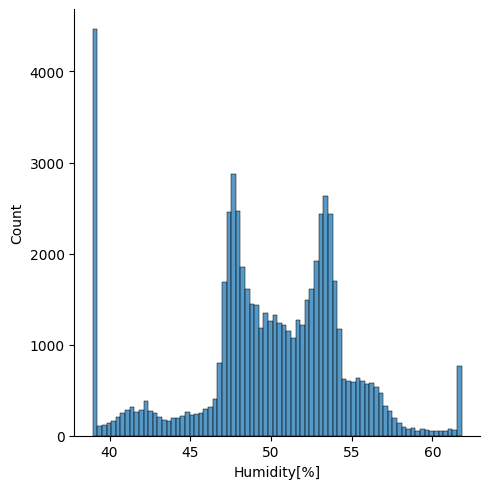

In [ ]:
#visualizing Humidity
sns.displot(df['Humidity[%]'])

**Bivariate** **Analysis**

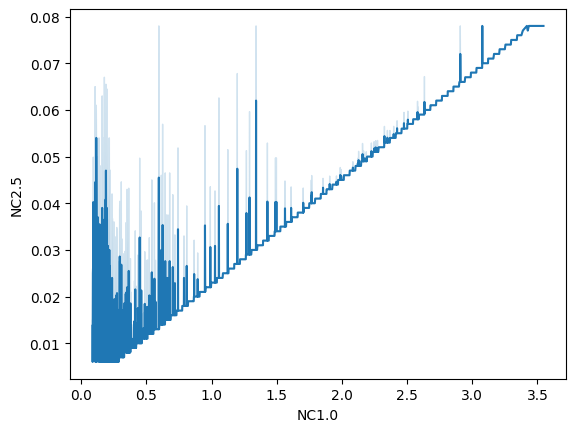

In [ ]:
sns.lineplot(x='NC1.0',y='NC2.5', data=df)
plt.xlabel=('NC1.0')
plt.ylabel=('NC2.5')
plt.show()

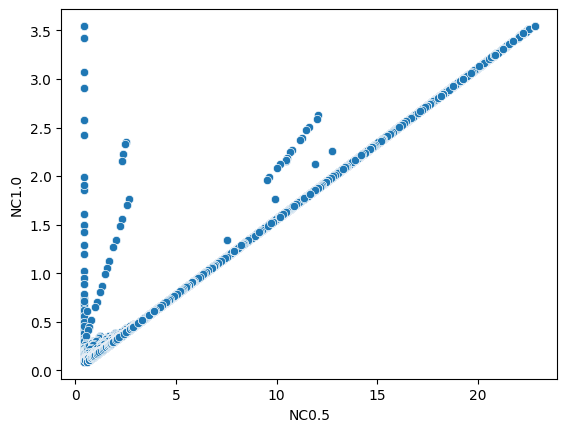

In [ ]:
sns.scatterplot(x='NC0.5',y='NC1.0', data=df)
plt.xlabel=('NC0.5')
plt.ylabel=('NC1.0')
plt.show()

**Multi**-**variate** **Analysis**

<Axes: >

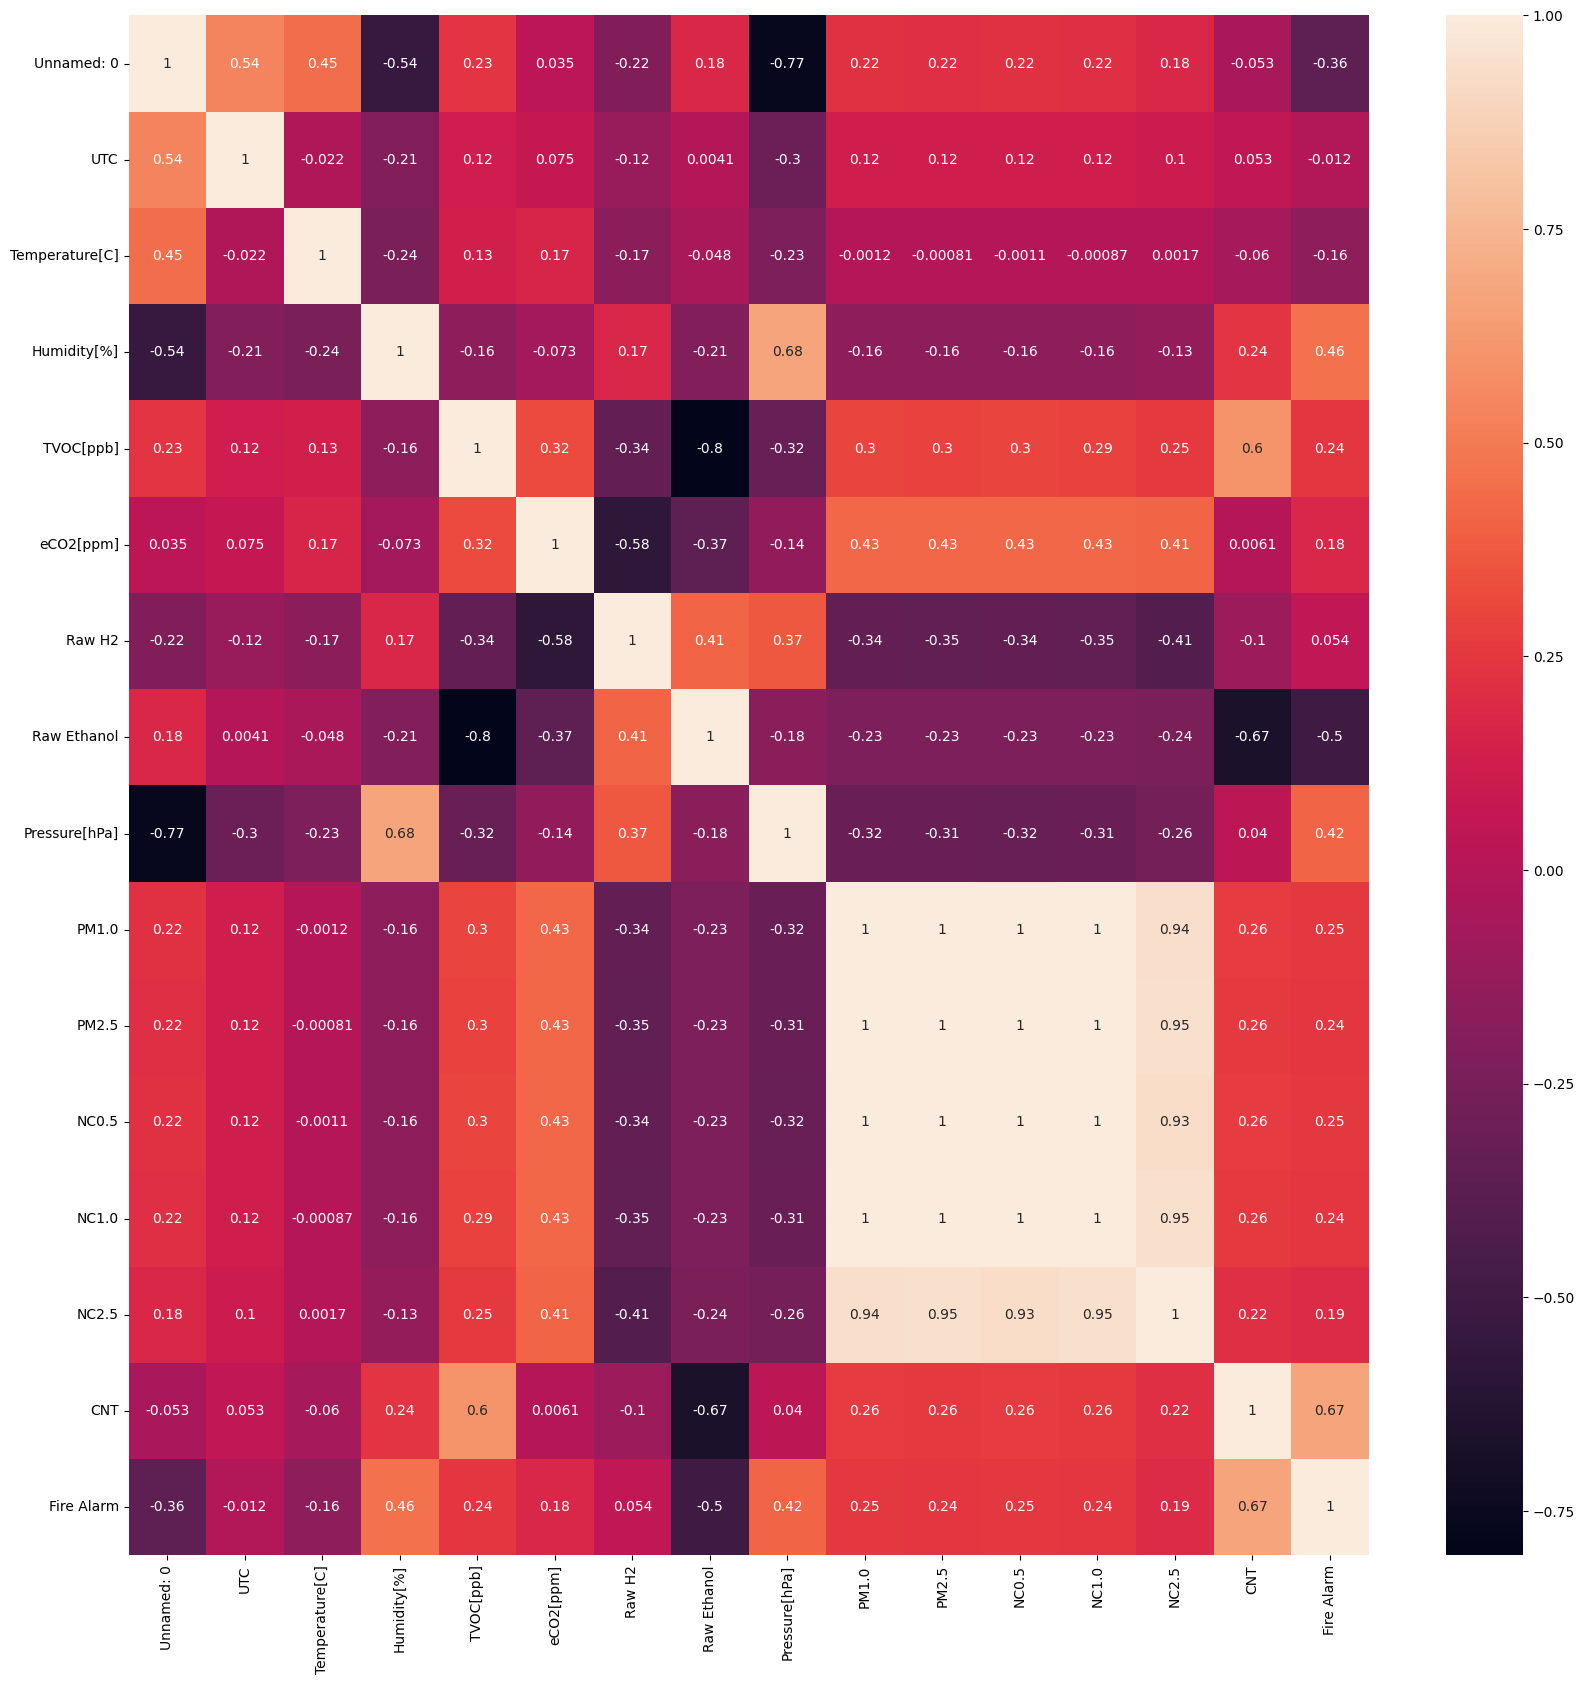

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [ ]:
#Since there is multi-collinearity between pairs(NC1.0,NC2.5) and (PM1.0,PM2.5) we can drop any of the column the pairs
df.drop(columns=['NC1.0','PM1.0'],axis=1,inplace=True)

In [ ]:
df.head()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM2.5,NC0.5,NC2.5,CNT,Fire Alarm
0,0,1.654733e+09,20.000,57.36,0.0,400.0,12411.5,18520.0,939.735,0.08,0.42,0.006,0,0
1,1,1.654733e+09,20.015,56.67,0.0,400.0,12411.5,18651.0,939.744,0.08,0.42,0.006,1,0
2,2,1.654733e+09,20.029,55.96,0.0,400.0,12411.5,18764.0,939.738,0.08,0.42,0.006,2,0
3,3,1.654733e+09,20.044,55.28,0.0,400.0,12411.5,18849.0,939.736,0.08,0.42,0.006,3,0
4,4,1.654733e+09,20.059,54.69,0.0,400.0,12411.5,18921.0,939.744,0.08,0.42,0.006,4,0


In [ ]:
#Finding the correlation between dependent and independent variables
df.corr()['Fire Alarm'].sort_values(ascending=False)

Fire Alarm        1.000000
CNT               0.673762
Humidity[%]       0.461422
Pressure[hPa]     0.415187
NC0.5             0.248873
PM2.5             0.243623
TVOC[ppb]         0.243437
NC2.5             0.194362
eCO2[ppm]         0.176239
Raw H2            0.053559
UTC              -0.012436
Temperature[C]   -0.158473
Unnamed: 0       -0.361351
Raw Ethanol      -0.500435
Name: Fire Alarm, dtype: float64

**Feature** **Selection**

In [ ]:
df.drop(columns=['UTC','Unnamed: 0','Raw Ethanol'],axis=1,inplace=True)

In [ ]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Pressure[hPa],PM2.5,NC0.5,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0.0,400.0,12411.5,939.735,0.08,0.42,0.006,0,0
1,20.015,56.67,0.0,400.0,12411.5,939.744,0.08,0.42,0.006,1,0
2,20.029,55.96,0.0,400.0,12411.5,939.738,0.08,0.42,0.006,2,0
3,20.044,55.28,0.0,400.0,12411.5,939.736,0.08,0.42,0.006,3,0
4,20.059,54.69,0.0,400.0,12411.5,939.744,0.08,0.42,0.006,4,0


In [ ]:
df.value_counts(['Fire Alarm'])

Fire Alarm
1             44757
0             17873
Name: count, dtype: int64

In [ ]:
#Seperating dependent and independent variables
x=df.drop(columns=['Fire Alarm'])
y=df['Fire Alarm']

In [ ]:
from imblearn.over_sampling import SMOTE
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Perform SMOTE oversampling
X_resampled, y_resampled = smote.fit_resample(x, y)

# Check the new value countsS
print(pd.Series(y_resampled).value_counts())

Fire Alarm
0    44757
1    44757
Name: count, dtype: int64


In [ ]:
x.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Pressure[hPa],PM2.5,NC0.5,NC2.5,CNT
0,20.000,57.36,0.0,400.0,12411.5,939.735,0.08,0.42,0.006,0
1,20.015,56.67,0.0,400.0,12411.5,939.744,0.08,0.42,0.006,1
2,20.029,55.96,0.0,400.0,12411.5,939.738,0.08,0.42,0.006,2
3,20.044,55.28,0.0,400.0,12411.5,939.736,0.08,0.42,0.006,3
4,20.059,54.69,0.0,400.0,12411.5,939.744,0.08,0.42,0.006,4


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Fire Alarm, dtype: int64

**Splitting** **data** **into** **training** **and** **testing** **sets**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

**Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
# Transform your data
scaled_data = scaler.fit_transform(x_train)

**Model** **Building**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
clf = DecisionTreeClassifier()

In [ ]:
# Train the classifier on the training data
clf.fit(x_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(x_test)

# Evaluate the classifier
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3605
           1       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



In [ ]:
confusion_matrix(y_test,y_pred)

array([[3605,    0],
       [   1, 8920]])

In [ ]:
df.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Pressure[hPa],PM2.5,NC0.5,NC2.5,CNT,Fire Alarm
0,20.000,57.36,0.0,400.0,12411.5,939.735,0.08,0.42,0.006,0,0
1,20.015,56.67,0.0,400.0,12411.5,939.744,0.08,0.42,0.006,1,0
2,20.029,55.96,0.0,400.0,12411.5,939.738,0.08,0.42,0.006,2,0
3,20.044,55.28,0.0,400.0,12411.5,939.736,0.08,0.42,0.006,3,0
4,20.059,54.69,0.0,400.0,12411.5,939.744,0.08,0.42,0.006,4,0


In [ ]:
clf.predict([[20.000,57.36,0.0,400.0,12411.5,939.735,0.08,0.42,0.006,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
df.iloc[4243]

Temperature[C]       -2.958
Humidity[%]          52.130
TVOC[ppb]           123.000
eCO2[ppm]           400.000
Raw H2            13225.000
Pressure[hPa]       939.656
PM2.5                 2.120
NC0.5                14.040
NC2.5                 0.049
CNT                4243.000
Fire Alarm            1.000
Name: 4243, dtype: float64

In [ ]:
df.iloc[4244]

Temperature[C]       -2.968
Humidity[%]          52.310
TVOC[ppb]           119.000
eCO2[ppm]           400.000
Raw H2            13219.000
Pressure[hPa]       939.649
PM2.5                 2.080
NC0.5                13.800
NC2.5                 0.049
CNT                4244.000
Fire Alarm            1.000
Name: 4244, dtype: float64

In [ ]:
clf.predict([[-2.958,52.130,123.000,400.000, 13225.000,939.656,2.120,14.040,0.049,4243.000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [ ]:
#Initializing the model
model_lr = LogisticRegression()
model_lr.fit(x_train,y_train)
lr_pred_test=model_lr.predict(x_test)
lr_pred_train=model_lr.predict(x_train)
test_acc_lr=accuracy_score(y_test,lr_pred_test)
train_acc_lr=accuracy_score(y_train,lr_pred_train)
print('Logistic Regression test accuracy: ',test_acc_lr)
print(classification_report(y_test,lr_pred_test))

Logistic Regression test accuracy:  0.9691840970780776
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      3605
           1       0.98      0.98      0.98      8921

    accuracy                           0.97     12526
   macro avg       0.96      0.96      0.96     12526
weighted avg       0.97      0.97      0.97     12526



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
confusion_matrix(y_test,lr_pred_test)

array([[3437,  168],
       [ 218, 8703]])

In [ ]:
model_lr.predict([[20.000,57.36,0.0,400.0,12411.5,939.735,0.08,0.42,0.006,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
model_lr.predict([[-2.958,52.130,123.000,400.000, 13225.000,939.656,2.120,14.040,0.049,4243.000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

**Support** **Vector** **Machine** **Model**

In [ ]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(x_train,y_train)
svm_pred_test=model_svm.predict(x_test)
svm_pred_train=model_svm.predict(x_train)
test_acc_svm=accuracy_score(y_test,svm_pred_test)
train_acc_svm=accuracy_score(y_train,svm_pred_train)
print('SVM Test Accuracy: ',test_acc_svm)
print(classification_report(y_test,svm_pred_test))

SVM Test Accuracy:  0.9422002235350471
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      3605
           1       0.99      0.93      0.96      8921

    accuracy                           0.94     12526
   macro avg       0.92      0.95      0.93     12526
weighted avg       0.95      0.94      0.94     12526



In [ ]:
confusion_matrix(y_test,svm_pred_test)

array([[3488,  117],
       [ 607, 8314]])

In [ ]:
model_svm.predict([[20.000,57.36,0.0,400.0,12411.5,939.735,0.08,0.42,0.006,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
model_svm.predict([[-2.958,52.130,123.000,400.000, 13225.000,939.656,2.120,14.040,0.049,4243.000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([1])

**Gradient** **Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)
GBC_pred_test=GBC.predict(x_test)
GBC_pred_train=GBC.predict(x_train)
GBC_test_acc=accuracy_score(y_test,GBC_pred_test)
GBC_train_acc=accuracy_score(y_train,GBC_pred_train)
print('GB accuracy is: ',GBC_test_acc)
print(classification_report(y_test,GBC_pred_test))

GB accuracy is:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3605
           1       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



In [ ]:
GBC.predict([[20.000,57.36,0.0,400.0,12411.5,939.735,0.08,0.42,0.006,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
GBC.predict([[-2.958,52.130,123.000,400.000, 13225.000,939.656,2.120,14.040,0.049,4243.000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([1])

**KNN** **classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
knn_pred_test=knn.predict(x_test)
knn_pred_train=knn.predict(x_train)
test_acc_knn=accuracy_score(y_test,knn_pred_test)
train_acc_knn=accuracy_score(y_train,knn_pred_train)
print('KNN Test Accuracy is: ',test_acc_knn)
print(classification_report(y_test,knn_pred_test))

KNN Test Accuracy is:  0.9992814944914578
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3605
           1       1.00      1.00      1.00      8921

    accuracy                           1.00     12526
   macro avg       1.00      1.00      1.00     12526
weighted avg       1.00      1.00      1.00     12526



In [ ]:
confusion_matrix(y_test,knn_pred_test)

array([[3599,    6],
       [   3, 8918]])

In [ ]:
knn.predict([[20.000,57.36,0.0,400.0,12411.5,939.735,0.08,0.42,0.006,0]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
knn.predict([[-2.958,52.130,123.000,400.000, 13225.000,939.656,2.120,14.040,0.049,4243.000]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array([1])

**Testing** **the** **model**

In [ ]:
df.tail()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Pressure[hPa],PM2.5,NC0.5,NC2.5,CNT,Fire Alarm
62625,18.438,38.965,625.0,400.0,13527.5,937.623,0.65,4.32,0.015,5739,0
62626,18.653,38.965,612.0,400.0,13527.5,937.623,0.63,4.18,0.015,5740,0
62627,18.867,38.965,627.0,400.0,13527.5,937.623,0.60,3.95,0.014,5741,0
62628,19.083,38.965,638.0,400.0,13527.5,937.623,0.59,3.92,0.014,5742,0
62629,19.299,38.965,643.0,400.0,13527.5,937.623,0.59,3.90,0.014,5743,0


In [ ]:
model_lr.predict([[19.299	,38.965,	643.0,	400.0,	13527.5,	937.623,	0.59,	3.90,	0.014,	5743	]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

Comparing the models using different evaluation metrics


In [ ]:
#Defining the list of model names
model_names=['Decision tree classifier','Logistic Regression','SVM','Gradient Boosting','KNN']

In [ ]:
#Defining the list of predicted test labels for each model
y_pred_tests=[y_pred,lr_pred_test,svm_pred_test,GBC_pred_test,knn_pred_test]

In [ ]:
#creating an empty dataframe to store compared results
results_df=pd.DataFrame(columns=['Model','Test Accuracy','Precision','Recall','F1-score'])

In [ ]:
results_df = pd.DataFrame(columns=['Model', 'Test Accuracy', 'Precision', 'Recall', 'F1-score'])

for i, model_name in enumerate(model_names):
    y_pred_test = y_pred_tests[i]

    test_acc = accuracy_score(y_test, y_pred_test)
    classification = classification_report(y_test, y_pred_test, output_dict=True)
    precision = classification['macro avg']['precision']
    recall = classification['macro avg']['recall']
    f1_score = classification['macro avg']['f1-score']

    # Use .loc to add a new row to the DataFrame
    results_df.loc[len(results_df.index)] = {
        'Model': model_name,
        'Test Accuracy': test_acc,
        'Precision': precision,
        'Recall': recall,
        'F1-score': f1_score
    }

# Displaying results in table-like format
print(results_df.to_string(index=False))

                   Model  Test Accuracy  Precision   Recall  F1-score
Decision tree classifier       0.999920   0.999861 0.999944  0.999903
     Logistic Regression       0.969184   0.960709 0.964481  0.962568
                     SVM       0.942200   0.918947 0.949752  0.932125
       Gradient Boosting       1.000000   1.000000 1.000000  1.000000
                     KNN       0.999281   0.999247 0.999000  0.999123


In [ ]:
import pickle
with open('knn.pkl', 'wb') as files:
    pickle.dump(knn,files)

In [ ]:
with open('knn.pkl', 'rb') as f:
    knn=pickle.load(f)